# 1.Reading and Understanding the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
countrydf = pd.read_csv("Country-data.csv")
countrydf.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [4]:
datadict = pd.read_csv("data-dictionary.csv")
datadict.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services. Given as %age o...
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age o...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [5]:
countrydf.shape

(167, 10)

In [6]:
countrydf.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
countrydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# 2. Data Cleansing

In [8]:
countrydf.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
countrydf.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [10]:
countrydf.loc[countrydf.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [11]:
categorical = countrydf.select_dtypes(include = ['object']).columns
numerical = countrydf.select_dtypes(exclude = ['object']).columns

# 3. Data Vizualization

In [12]:
import matplotlib.ticker as plticker
%matplotlib inline
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')

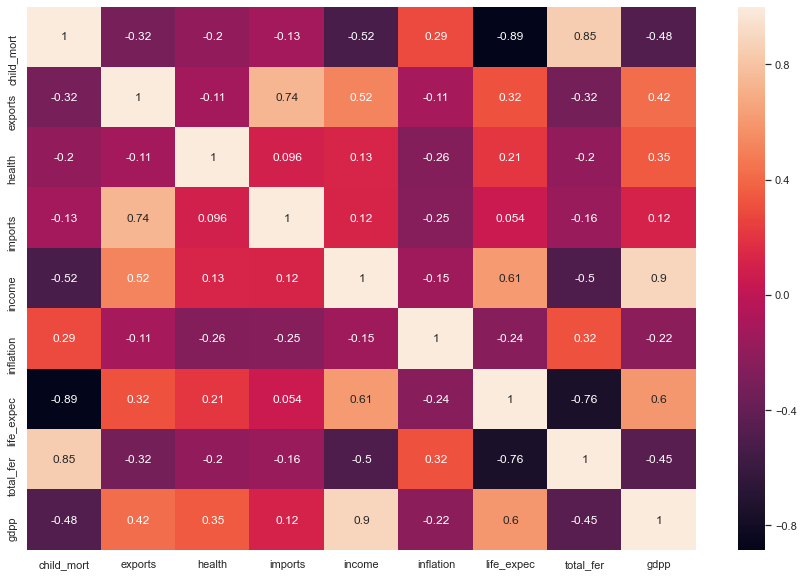

In [13]:
plt.figure(figsize = (15,10))        
sns.heatmap(countrydf.corr(),annot = True)

Inference:
1. child_mortality and life_expentency are highly correlated 
2. child_mortality and total_fertility are highly correlated 
3. imports and exports are highly correlated 
4. life_expentency and total_fertility are highly correlated 

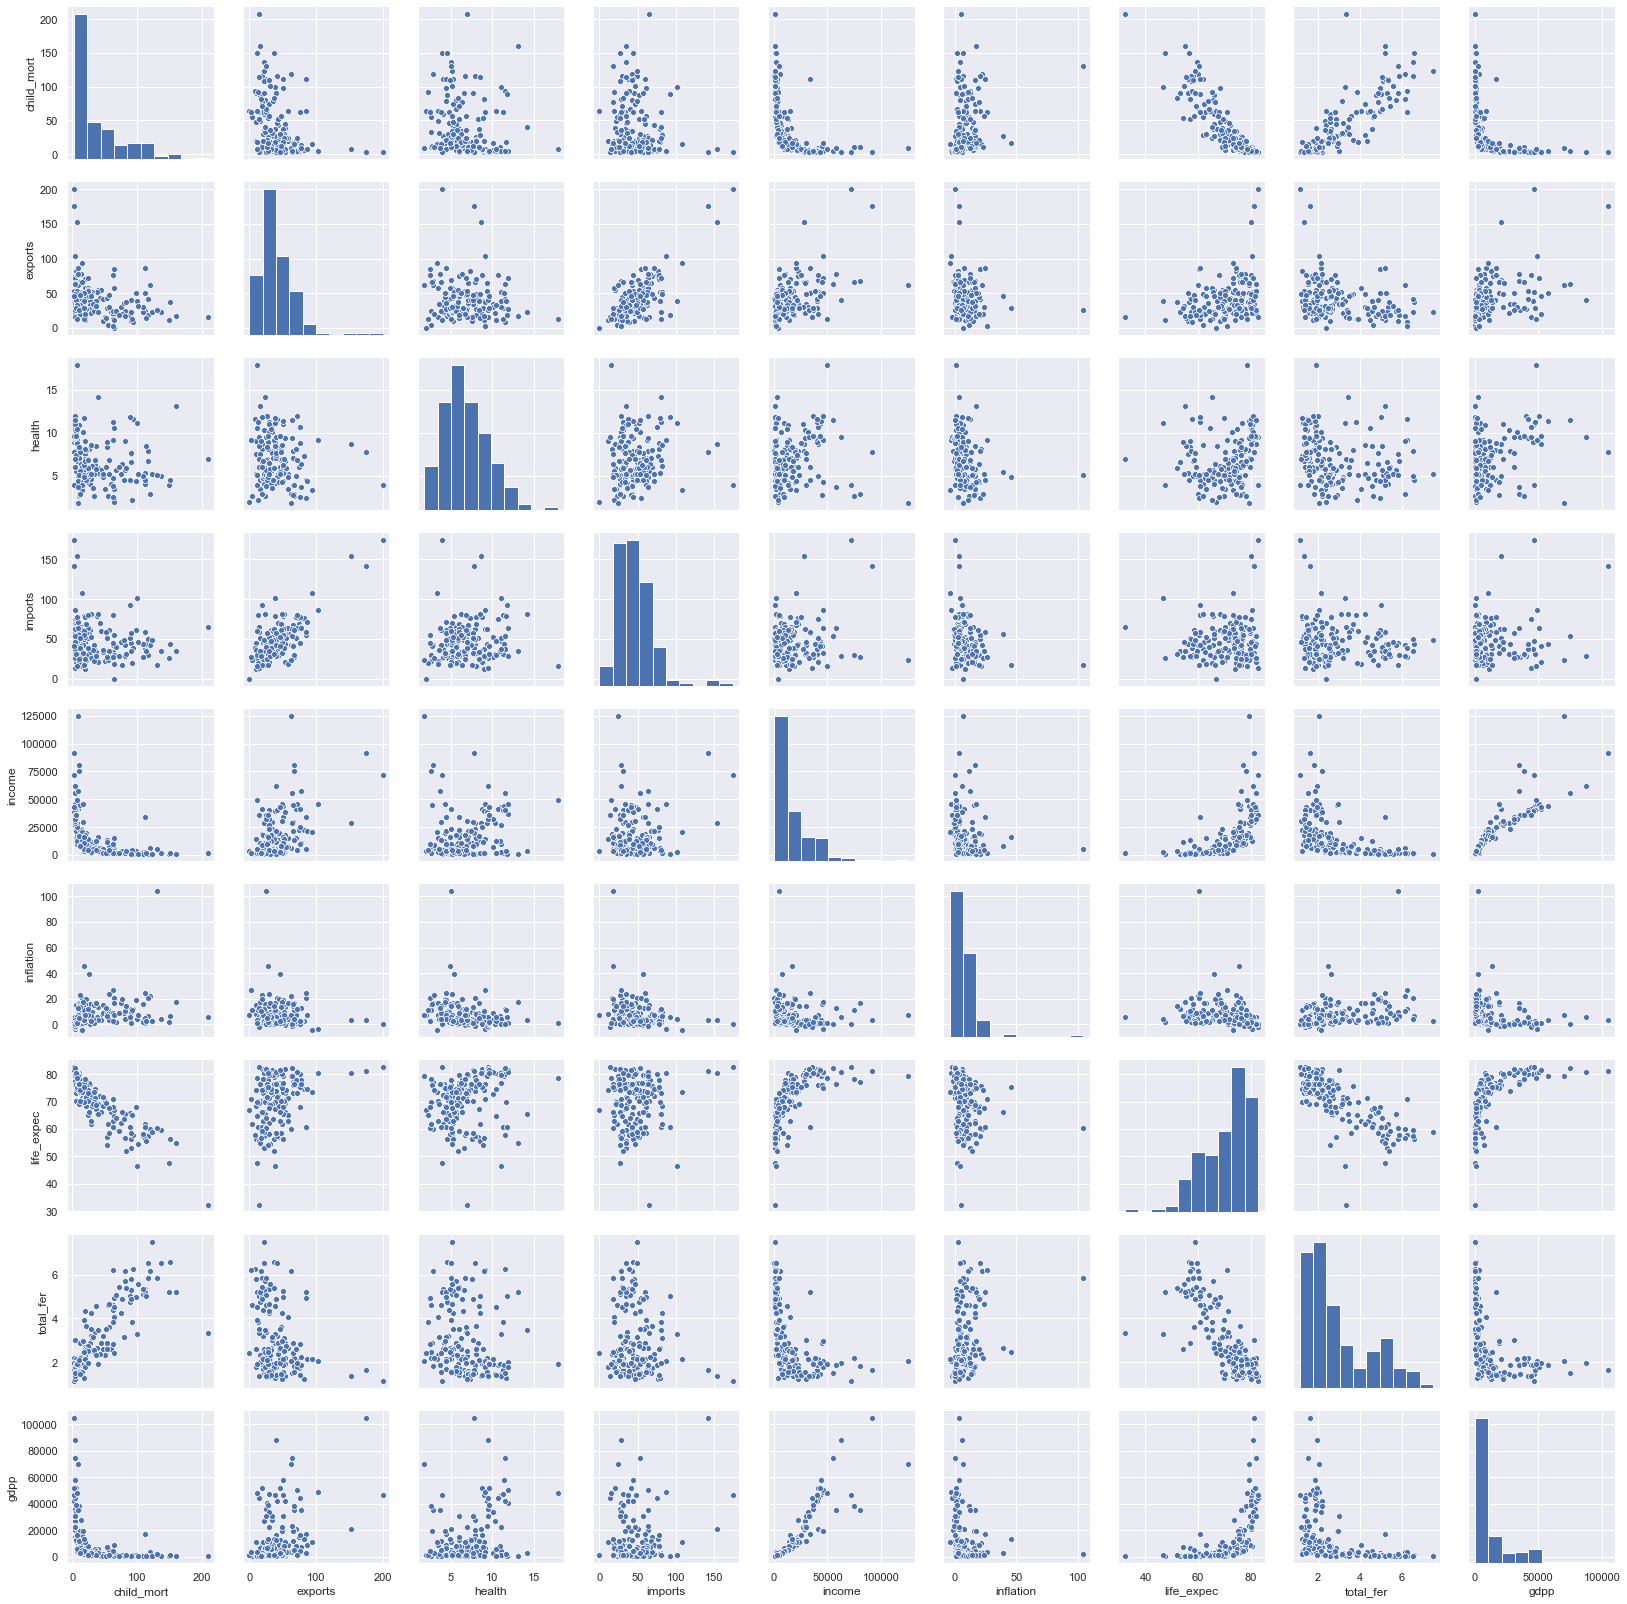

In [14]:
sns.pairplot(countrydf)

# 4. Data Preparation

In [15]:
#Percentage Conversion to absolute values

countrydf['exports'] = countrydf['exports']*countrydf['gdpp']/100
countrydf['imports'] = countrydf['imports']*countrydf['gdpp']/100
countrydf['health'] = countrydf['health']*countrydf['gdpp']/100

In [16]:
countrydf.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200
5,Argentina,14.5000,1946.7000,834.3000,1648.0000,18700,20.9000,75.8000,2.3700,10300
6,Armenia,18.1000,669.7600,141.6800,1458.6600,6700,7.7700,73.3000,1.6900,3220
7,Australia,4.8000,10276.2000,4530.8700,10847.1000,41400,1.1600,82.0000,1.9300,51900
8,Austria,4.3000,24059.7000,5159.0000,22418.2000,43200,0.8730,80.5000,1.4400,46900
9,Azerbaijan,39.2000,3171.1200,343.3920,1208.8800,16000,13.8000,69.1000,1.9200,5840


In [17]:
countrydf_drop = countrydf.copy()
country = countrydf_drop.pop('country')

In [18]:
countrydf_drop.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200
5,14.5000,1946.7000,834.3000,1648.0000,18700,20.9000,75.8000,2.3700,10300
6,18.1000,669.7600,141.6800,1458.6600,6700,7.7700,73.3000,1.6900,3220
7,4.8000,10276.2000,4530.8700,10847.1000,41400,1.1600,82.0000,1.9300,51900
8,4.3000,24059.7000,5159.0000,22418.2000,43200,0.8730,80.5000,1.4400,46900
9,39.2000,3171.1200,343.3920,1208.8800,16000,13.8000,69.1000,1.9200,5840


In [19]:
scaler = StandardScaler()
country_scaled = scaler.fit_transform(countrydf_drop)

In [20]:
country_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

# 5. PCA Application

In [21]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(country_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [22]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [23]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

Text(0, 0.5, 'Variance Ratio')

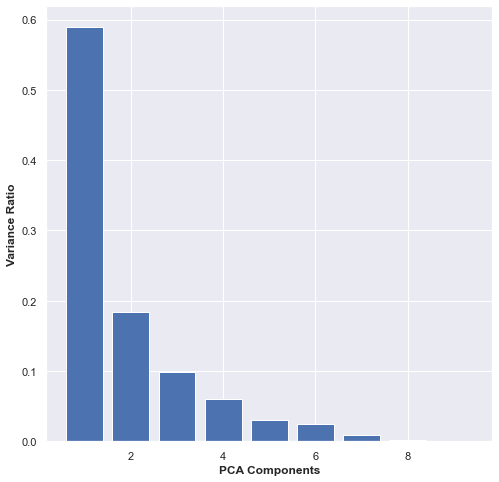

In [24]:
ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

Inference:
- For first component variance is almost 60%.
- For second component variance is almost 20%.

Text(0, 0.5, 'Cumulative Explained Variance')

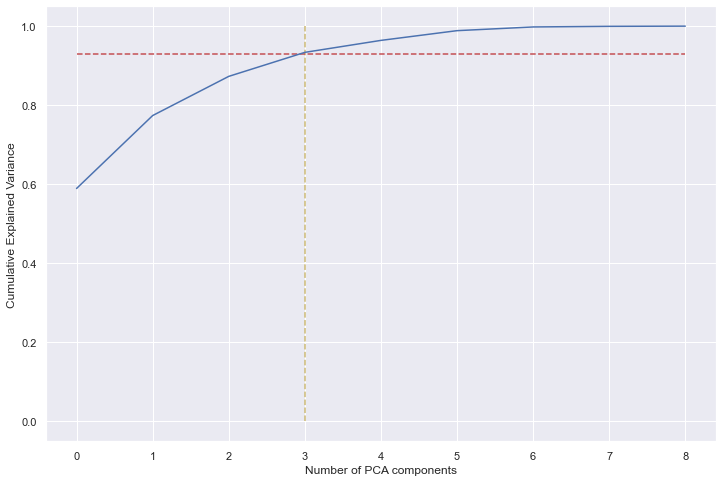

In [30]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=3, ymax=1, ymin=0, colors="y", linestyles="--")
plt.hlines(y=0.93, xmax=8, xmin=0, colors="r", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

**Inference** : more than 90% variance is explained by the first 3 principal components

In [31]:
col_drop = list(countrydf.drop(['country'],axis=1).columns)
attributes_pca = pd.DataFrame({'Attribute':col_drop,'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2]})

In [32]:
attributes_pca

,Attribute,PC_1,PC_2,PC_3
0,child_mort,-0.3164,0.4763,-0.1500
1,exports,0.3429,0.3973,-0.0306
2,health,0.3585,0.1551,-0.0757
3,imports,0.3449,0.3708,-0.0722
4,income,0.3800,0.1284,0.1458
5,inflation,-0.1431,0.2213,0.9484
6,life_expec,0.3439,-0.3698,0.1968
7,total_fer,-0.3028,0.4597,-0.0778
8,gdpp,0.4000,0.2006,0.0103


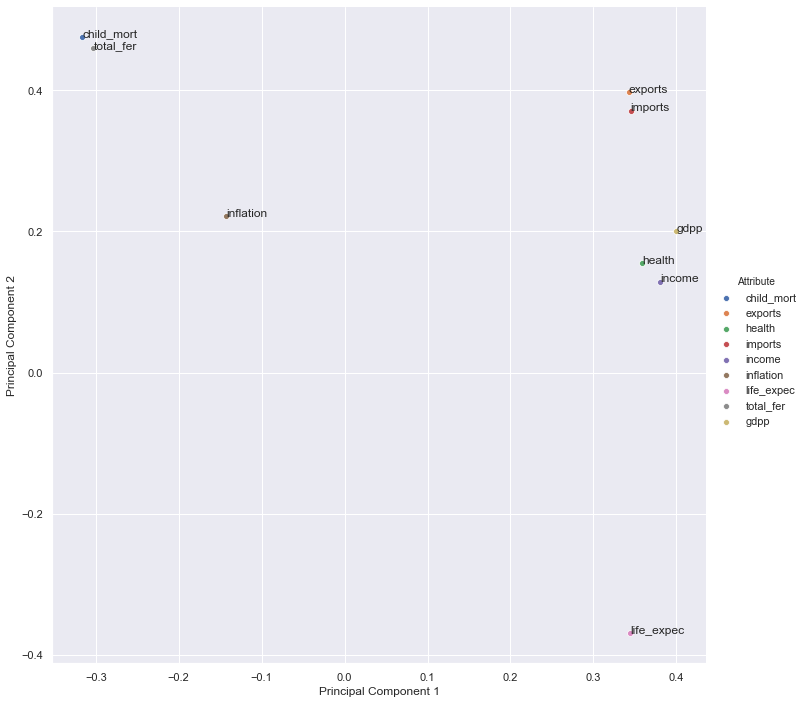

In [39]:
#PC1 and PC2

sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Attribute" ,height=10)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_2[i]))

Inference:
- life expectency, income, gdpp and health are explained by PC1.
- imports and exports are explained by PC1 and PC2.
- child mortality and total fertility are explained by PC2.
- inflation is neither explained by PC1 nor with PC2

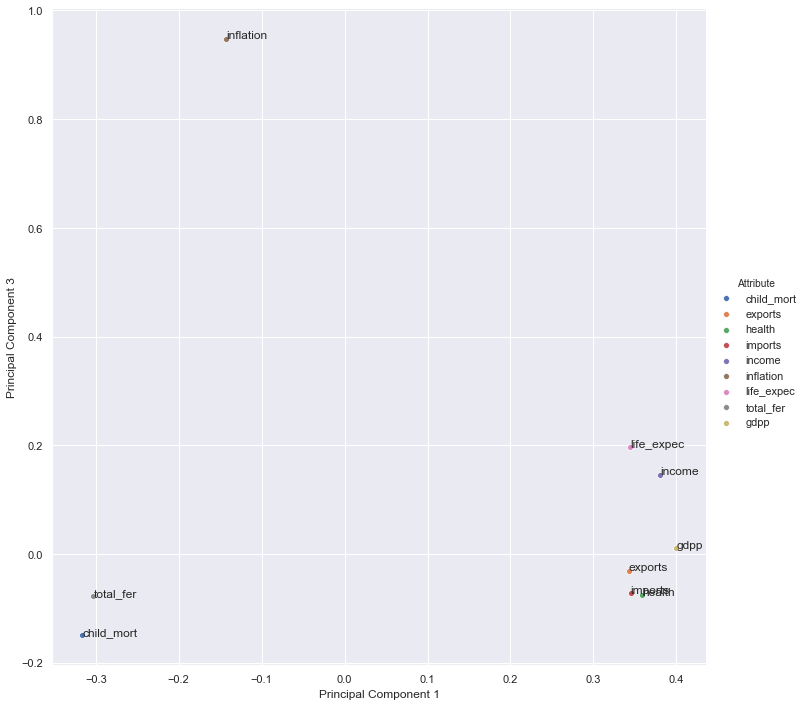

In [40]:
# PC1 and PC3

sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_3"], hue = "Attribute" ,height=10)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 3")

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_3[i]))

Inference:

- inflation is explained by PC3

In [41]:
incrmntl_pca = IncrementalPCA(n_components=3)

In [43]:
incpca_df = incrmntl_pca.fit_transform(country_scaled)
incpca_df

array([[-2.63744157e+00,  1.46903797e+00, -5.41359106e-01],
       [-2.22769569e-02, -1.43189586e+00, -2.07009539e-02],
       [-4.57626261e-01, -6.73300938e-01,  9.61867281e-01],
       [-2.72452030e+00,  2.17458267e+00,  6.06686548e-01],
       [ 6.49848516e-01, -1.02437392e+00, -2.50102847e-01],
       [ 3.71968554e-02, -6.80889086e-01,  1.46696276e+00],
       [-3.32691520e-01, -1.27451685e+00,  1.76636110e-01],
       [ 3.18036154e+00, -2.50784878e-01, -1.16877257e-01],
       [ 3.81568156e+00,  2.56083499e-01, -2.70495294e-01],
       [-4.67515152e-01, -4.93492360e-01,  6.03288028e-01],
       [ 1.49875246e+00, -4.28907400e-01, -5.50237572e-01],
       [ 1.47097104e+00, -3.26795693e-01,  4.28411771e-01],
       [-1.01419903e+00, -7.11807758e-01, -1.16988551e-01],
       [ 8.45238116e-01, -1.00860625e+00, -4.17261615e-01],
       [-1.34473920e-02, -9.82186148e-01,  8.80913018e-01],
       [ 3.96087770e+00,  8.38740841e-01, -2.94077196e-01],
       [-4.02707071e-01, -9.21816189e-01

In [44]:
pcadf = pd.DataFrame(incpca_df, columns=["PC_1", "PC_2","PC_3"])
pca_df = pd.concat([country, pcadf], axis=1)
pca_df.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.6374,1.4690,-0.5414
1,Albania,-0.0223,-1.4319,-0.0207
2,Algeria,-0.4576,-0.6733,0.9619
3,Angola,-2.7245,2.1746,0.6067
4,Antigua and Barbuda,0.6498,-1.0244,-0.2501


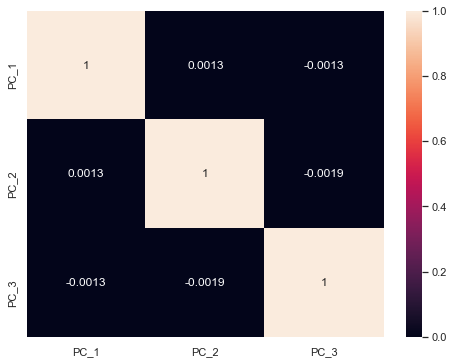

In [45]:
plt.figure(figsize = (8,6))        
ax = sns.heatmap(pca_df.corr(),annot = True)

Inference:
- The correlation among the attributes is almost 0.

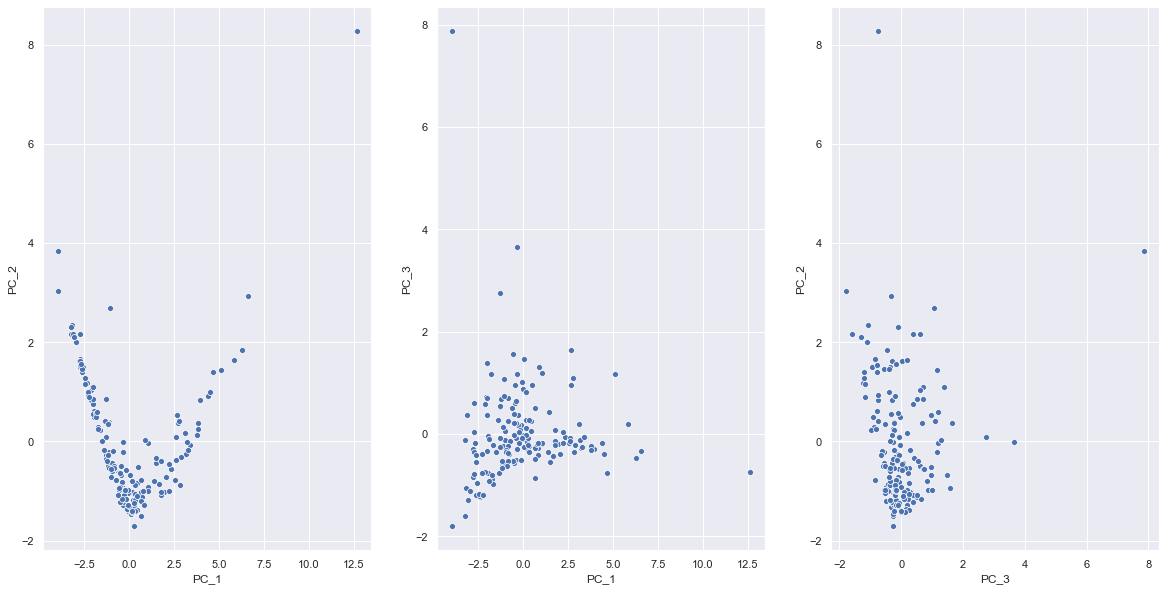

In [46]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.scatterplot(data=pca_df, x='PC_1', y='PC_2')
plt.subplot(1,3,2)
sns.scatterplot(data=pca_df, x='PC_1', y='PC_3')
plt.subplot(1,3,3)
sns.scatterplot(data=pca_df, x='PC_3', y='PC_2')

Text(0.5, 0, 'PC Components')

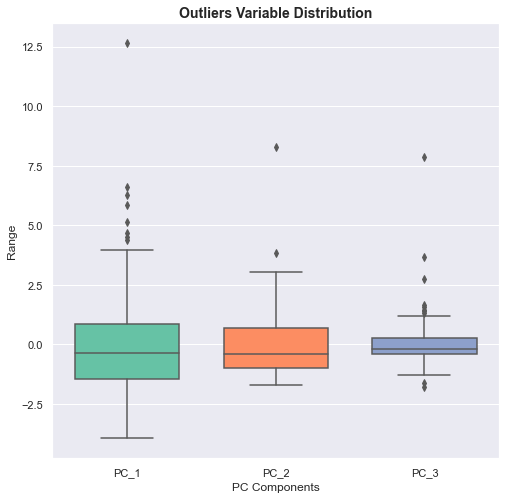

In [48]:
#Outlier treatment and analysis

outliers = ['PC_1','PC_2','PC_3']

sns.boxplot(data = pca_df[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range")
plt.xlabel("PC Components")

In [51]:
Q1 = pca_df.PC_1.quantile(0.05)
Q3 = pca_df.PC_1.quantile(0.95)
IQR = Q3 - Q1
pca_df = pca_df[(pca_df.PC_1 >= Q1) & (pca_df.PC_1 <= Q3)]



Q1 = pca_df.PC_2.quantile(0.05)
Q3 = pca_df.PC_2.quantile(0.95)
IQR = Q3 - Q1
pca_df = pca_df[(pca_df.PC_2 >= Q1) & (pca_df.PC_2 <= Q3)]



Q1 = pca_df.PC_3.quantile(0.05)
Q3 = pca_df.PC_3.quantile(0.95)
IQR = Q3 - Q1
pca_df = pca_df[(pca_df.PC_3 >= Q1) & (pca_df.PC_3 <= Q3)]

Text(0.5, 0, 'PC Components')

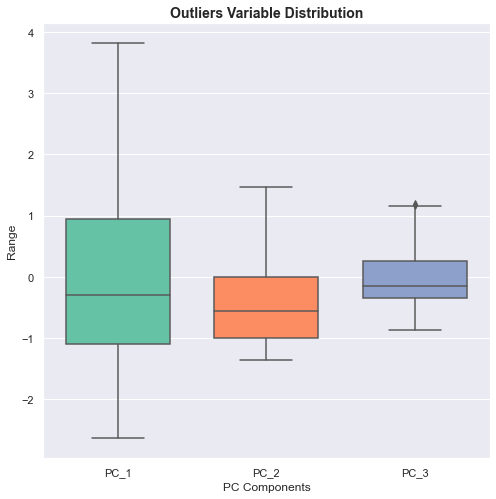

In [52]:
outliers = ['PC_1','PC_2','PC_3']

sns.boxplot(data = pca_df[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range")
plt.xlabel("PC Components")

In [59]:
pca_df = pca_df.reset_index(drop=True)
pca_df_final = pca_df.drop(['country'],axis=1)


In [60]:
pca_df_final.head()

,PC_1,PC_2,PC_3
0,-2.6374,1.4690,-0.5414
1,-0.4576,-0.6733,0.9619
2,0.6498,-1.0244,-0.2501
3,-0.3327,-1.2745,0.1766
4,3.1804,-0.2508,-0.1169


# 6. Hopkins Statistics Test

In [56]:
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [61]:
hopkins(pca_df_final)

0.8215813724135352

**Inference**:
- 0.8215813724135352 is a good Hopkins score for Clustering.

# 7. Model Building, Clustering and Sillhouette Analysis

### K-Means Clustering

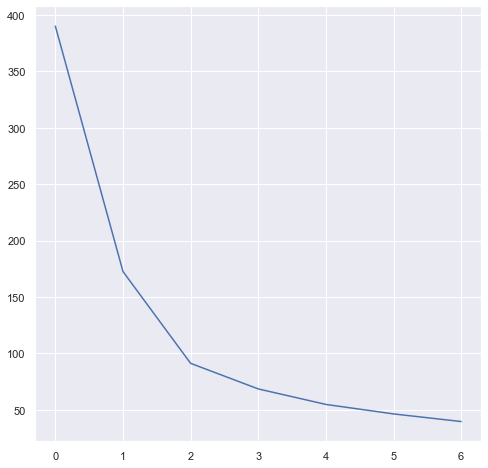

In [63]:
ssd = []
for num_clusters in list(range(1,8)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50,random_state= 100)
    model_clus.fit(pca_df_final)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

Inference : Proceeding with 4 or 5 clusters

## Sillhouette Analysis

In [64]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(pca_df_final)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(pca_df_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4873400103541441
For n_clusters=3, the silhouette score is 0.4639771456218248
For n_clusters=4, the silhouette score is 0.3987356568367148
For n_clusters=5, the silhouette score is 0.36170980333920066
For n_clusters=6, the silhouette score is 0.36603716544306125
For n_clusters=7, the silhouette score is 0.3703642483431638
For n_clusters=8, the silhouette score is 0.3752370154601887


In [65]:
cluster4 = KMeans(n_clusters=4, max_iter=50, random_state= 100)
cluster4.fit(pca_df_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [66]:
cluster4.labels_

array([3, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 3, 2, 2, 0, 1, 0, 2,
       0, 0, 3, 3, 2, 1, 2, 0, 0, 0, 0, 3, 2, 0, 1, 1, 3, 3, 0, 1, 3, 2,
       0, 0, 0, 2, 1, 0, 0, 0, 3, 2, 1, 0, 1, 0, 0, 3, 1, 0, 3, 2, 3, 2,
       2, 3, 2, 2, 1, 3, 2, 0, 0, 0, 0, 3, 0, 1, 2, 3, 2, 0, 0, 0, 2, 2,
       2, 0, 3, 0, 2, 2, 1, 3, 3, 2, 1, 0, 3, 0, 1, 0, 3, 0, 0, 2, 0, 3,
       0, 1, 1, 1, 2, 0, 0, 0, 3])

In [67]:
pca_df['Cluster_Id4'] = cluster4.labels_
pca_df.head()

,country,PC_1,PC_2,PC_3,Cluster_Id4
0,Afghanistan,-2.6374,1.4690,-0.5414,3
1,Algeria,-0.4576,-0.6733,0.9619,0
2,Antigua and Barbuda,0.6498,-1.0244,-0.2501,2
3,Armenia,-0.3327,-1.2745,0.1766,0
4,Australia,3.1804,-0.2508,-0.1169,1


In [68]:
pca_df['Cluster_Id4'].value_counts()

0    48
2    29
3    23
1    19
Name: Cluster_Id4, dtype: int64

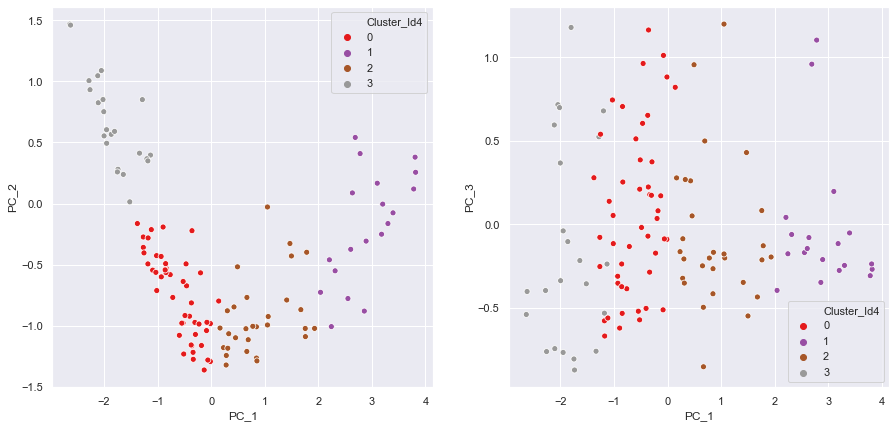

In [69]:
fig, axes = plt.subplots(1,2, figsize=(15,7))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id4',legend='full',palette="Set1",data=pca_df,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id4',legend='full',palette="Set1",data=pca_df,ax=axes[1])

Inference:
- In plot 1, lot of intra-distance between the cluster elements.

In [71]:
pca_df = pca_df.drop('Cluster_Id4',axis=1)

In [72]:
cluster5 = KMeans(n_clusters=5, max_iter=50,random_state=100)
cluster5.fit(pca_df_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [73]:
cluster5.labels_

array([0, 4, 1, 4, 2, 2, 4, 1, 1, 3, 1, 4, 3, 3, 3, 0, 4, 4, 3, 2, 3, 4,
       4, 4, 0, 0, 1, 2, 1, 4, 4, 3, 4, 0, 1, 3, 2, 2, 0, 0, 4, 2, 0, 1,
       4, 3, 3, 1, 2, 3, 3, 4, 0, 1, 2, 4, 2, 4, 4, 0, 2, 3, 0, 1, 0, 4,
       1, 0, 4, 4, 2, 0, 4, 3, 4, 3, 3, 0, 3, 2, 1, 0, 4, 4, 4, 3, 1, 1,
       4, 4, 0, 3, 1, 1, 1, 0, 0, 1, 1, 4, 0, 4, 2, 3, 0, 3, 4, 4, 3, 0,
       4, 2, 2, 2, 4, 3, 3, 4, 0])

In [74]:
pca_df['Cluster_Id'] = cluster5.labels_
pca_df.head()

,country,PC_1,PC_2,PC_3,Cluster_Id
0,Afghanistan,-2.6374,1.4690,-0.5414,0
1,Algeria,-0.4576,-0.6733,0.9619,4
2,Antigua and Barbuda,0.6498,-1.0244,-0.2501,1
3,Armenia,-0.3327,-1.2745,0.1766,4
4,Australia,3.1804,-0.2508,-0.1169,2


In [75]:
pca_df['Cluster_Id'].value_counts()

4    35
3    24
0    23
1    20
2    17
Name: Cluster_Id, dtype: int64

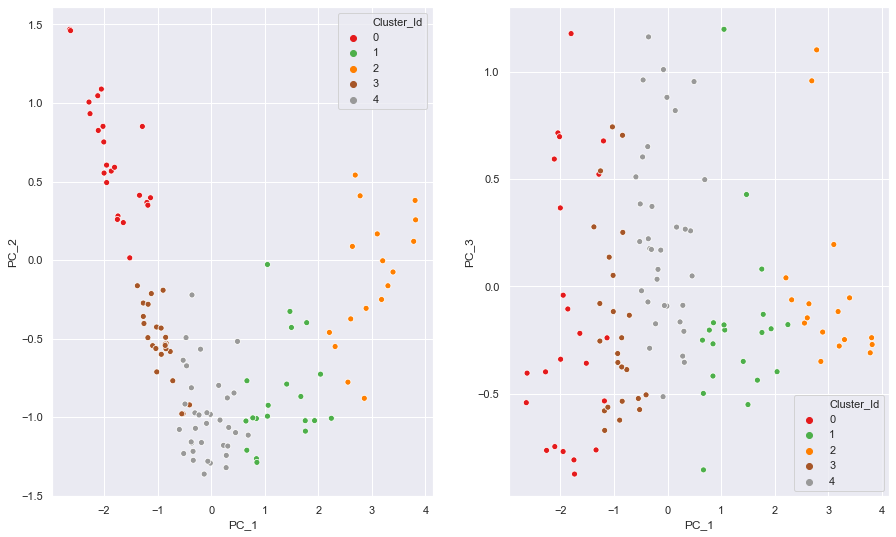

In [76]:
fig, axes = plt.subplots(1,2, figsize=(15,9))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id',legend='full',palette="Set1",data=pca_df,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id',legend='full',palette="Set1",data=pca_df,ax=axes[1])

Inference:
- same issue as 4 clusters with a new segment, proceeding with K means using 5 clusters.

In [77]:
merge = pd.merge(countrydf,pca_df,on='country')
merge_col = merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]


cluster_child = pd.DataFrame(merge_col.groupby(["Cluster_Id"]).child_mort.mean())
cluster_export = pd.DataFrame(merge_col.groupby(["Cluster_Id"]).exports.mean())
cluster_import = pd.DataFrame(merge_col.groupby(["Cluster_Id"]).imports.mean())
cluster_health = pd.DataFrame(merge_col.groupby(["Cluster_Id"]).health.mean())
cluster_income = pd.DataFrame(merge_col.groupby(["Cluster_Id"]).income.mean())
cluster_inflation = pd.DataFrame(merge_col.groupby(["Cluster_Id"]).inflation.mean())         
cluster_lifeexpec = pd.DataFrame(merge_col.groupby(["Cluster_Id"]).life_expec.mean())
cluster_totalfer = pd.DataFrame(merge_col.groupby(["Cluster_Id"]).total_fer.mean())
cluster_gdpp = pd.DataFrame(merge_col.groupby(["Cluster_Id"]).gdpp.mean())

concat = pd.concat([pd.Series([0,1,2,3,4]),cluster_child,cluster_export,cluster_import,cluster_health,cluster_income
                       ,cluster_inflation,cluster_lifeexpec,cluster_totalfer,cluster_gdpp], axis=1)
concat.columns = ["Cluster_Id", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
concat.head()

,Cluster_Id,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,68.4783,884.7745,838.6342,135.8739,4650.8696,10.7113,62.1696,4.5074,2152.7391
1,1,7.1400,9374.4700,9371.0950,1442.0290,26050.0000,1.6395,76.9150,1.7400,18835.0000
2,2,5.1412,16736.1118,15324.9353,3954.5006,41705.8824,2.8236,80.4765,1.7765,40911.7647
3,3,37.8875,896.5533,1187.5125,123.4549,5275.0000,6.5259,68.9583,2.9537,2364.2500
4,4,18.1686,2622.8243,2635.5677,411.1251,13102.0000,8.0534,74.0457,2.1071,6497.1429


In [78]:
merge_col.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2000,55.3000,248.2970,41.9174,1610,9.4400,56.2000,5.8200,553,0
1,Algeria,27.3000,1712.6400,1400.4400,185.9820,12900,16.1000,76.5000,2.8900,4460,4
2,Antigua and Barbuda,10.3000,5551.0000,7185.8000,735.6600,19100,1.4400,76.8000,2.1300,12200,1
3,Armenia,18.1000,669.7600,1458.6600,141.6800,6700,7.7700,73.3000,1.6900,3220,4
4,Australia,4.8000,10276.2000,10847.1000,4530.8700,41400,1.1600,82.0000,1.9300,51900,2


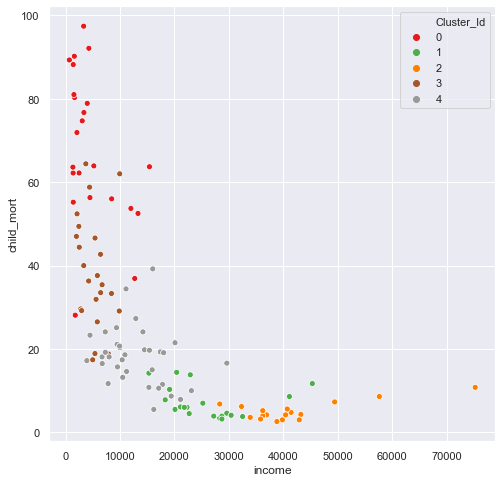

In [80]:
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = merge_col,legend='full',palette="Set1")

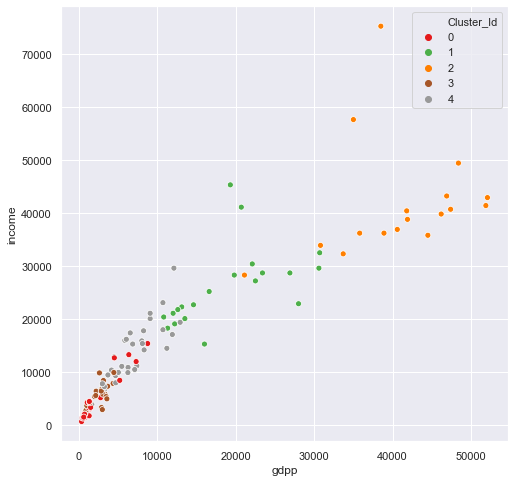

In [81]:
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = merge_col,legend='full',palette="Set1")

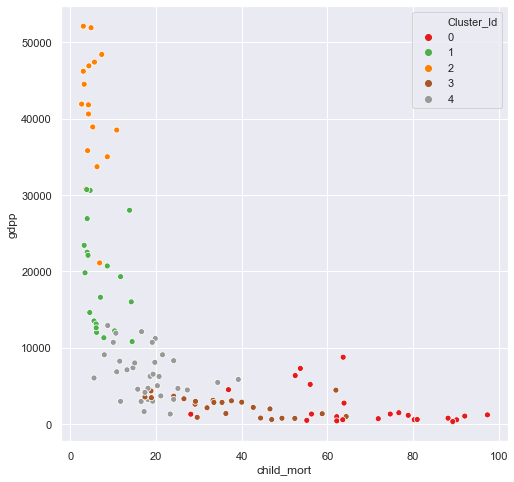

In [82]:
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=merge_col,legend='full',palette="Set1")

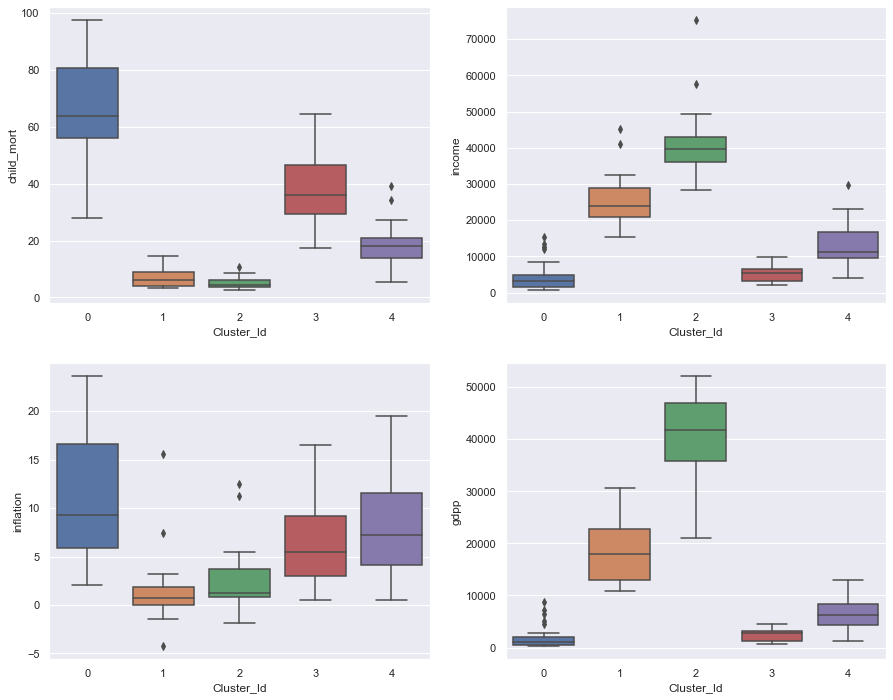

In [83]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'Cluster_Id', y = 'child_mort', data = merge_col,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id', y = 'income', data = merge_col,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id', y = 'inflation', data=merge_col,ax=axes[1][0])
sns.boxplot(x = 'Cluster_Id', y = 'gdpp', data=merge_col,ax=axes[1][1])

Inference:
- Child Mortality is high for Cluster 0 and Cluster 3.
- Income per capita and gdpp seems low for countries in clusters 0 and 3.
- Hence Countries in clusters 0 and 3 need help and aid.

In [84]:
#Cluster 0

merge_col[merge_col['Cluster_Id']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2000,55.3000,248.2970,41.9174,1610,9.4400,56.2000,5.8200,553,0
15,Botswana,52.5000,2768.6000,3257.5500,527.0500,13300,8.9200,57.1000,2.8800,6350,0
24,Comoros,88.2000,126.8850,397.5730,34.6819,1410,3.8700,65.9000,4.7500,769,0
25,"Congo, Rep.",63.9000,2331.7400,1498.7800,67.4040,5190,20.7000,60.4000,4.9500,2740,0
33,Eritrea,55.2000,23.0878,112.3060,12.8212,1420,11.6000,61.7000,4.6100,482,0
38,Gabon,63.7000,5048.7500,1653.7500,306.2500,15400,16.6000,62.9000,4.0800,8750,0
39,Gambia,80.3000,133.7560,239.9740,31.9778,1660,4.3000,65.5000,5.7100,562,0
42,Ghana,74.7000,386.4500,601.2900,68.3820,3060,16.6000,62.2000,4.2700,1310,0
52,Iraq,36.9000,1773.0000,1534.5000,378.4500,12700,16.6000,67.2000,4.5600,4500,0
59,Kenya,62.2000,200.1690,324.9120,45.9325,2480,2.0900,62.8000,4.3700,967,0


In [85]:
#Cluster 3

merge_col[merge_col['Cluster_Id']==3]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
9,Bangladesh,49.4000,121.2800,165.2440,26.6816,2440,7.1400,70.4000,2.3300,758,3
12,Belize,18.8000,2525.8800,2495.5000,225.6800,7880,1.1400,71.4000,2.7100,4340,3
13,Bhutan,42.7000,926.5000,1541.2600,113.3600,6420,5.9900,72.1000,2.3800,2180,3
14,Bolivia,46.6000,815.7600,679.1400,95.8320,5410,8.7800,71.6000,3.2000,1980,3
18,Cambodia,44.4000,425.2260,467.6700,44.6448,2520,3.1200,66.1000,2.8800,786,3
20,Cape Verde,26.5000,1082.3700,2045.5800,135.3790,5830,0.5050,72.5000,2.6700,3310,3
31,Egypt,29.1000,553.8000,691.6000,121.1600,9860,10.1000,70.5000,3.1900,2600,3
35,Fiji,24.1000,2109.7000,2332.3500,177.3900,7350,4.2300,65.3000,2.6700,3650,3
45,Guatemala,35.4000,730.1400,1027.2900,193.8550,6710,5.1400,71.3000,3.3800,2830,3
46,Guyana,37.6000,1562.5600,2404.6400,163.5520,5840,5.7300,65.5000,2.6500,3040,3


## Hierarchical Clustering

In [86]:
pca_df_final.head()

,PC_1,PC_2,PC_3
0,-2.6374,1.4690,-0.5414
1,-0.4576,-0.6733,0.9619
2,0.6498,-1.0244,-0.2501
3,-0.3327,-1.2745,0.1766
4,3.1804,-0.2508,-0.1169


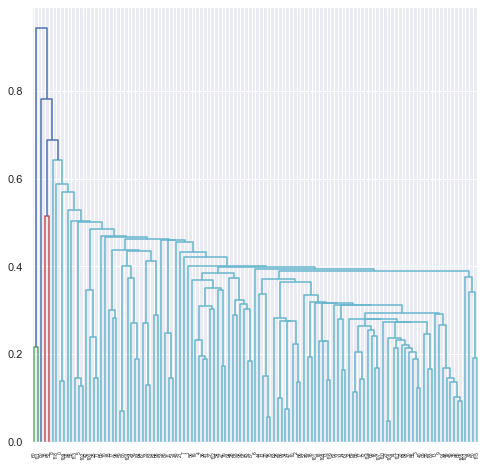

In [87]:
#Single Linkage

mergings = linkage(pca_df_final, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

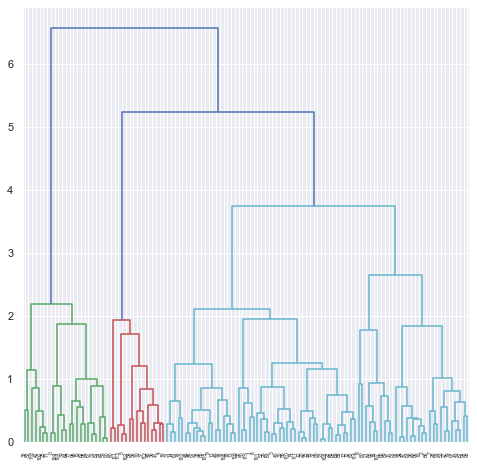

In [88]:
#Complete Linkage

mergings = linkage(pca_df_final, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [89]:
df_pca_hc = pca_df.copy()
df_pca_hc = df_pca_hc.drop('Cluster_Id',axis=1)
df_pca_hc.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.6374,1.4690,-0.5414
1,Algeria,-0.4576,-0.6733,0.9619
2,Antigua and Barbuda,0.6498,-1.0244,-0.2501
3,Armenia,-0.3327,-1.2745,0.1766
4,Australia,3.1804,-0.2508,-0.1169


In [90]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
df_hc = pd.concat([df_pca_hc, clusterCut], axis=1)
df_hc.columns = ['country', 'PC_1', 'PC_2','PC_3','Cluster_Id']

In [91]:
df_hc.head()

,country,PC_1,PC_2,PC_3,Cluster_Id
0,Afghanistan,-2.6374,1.4690,-0.5414,0
1,Algeria,-0.4576,-0.6733,0.9619,1
2,Antigua and Barbuda,0.6498,-1.0244,-0.2501,2
3,Armenia,-0.3327,-1.2745,0.1766,1
4,Australia,3.1804,-0.2508,-0.1169,3


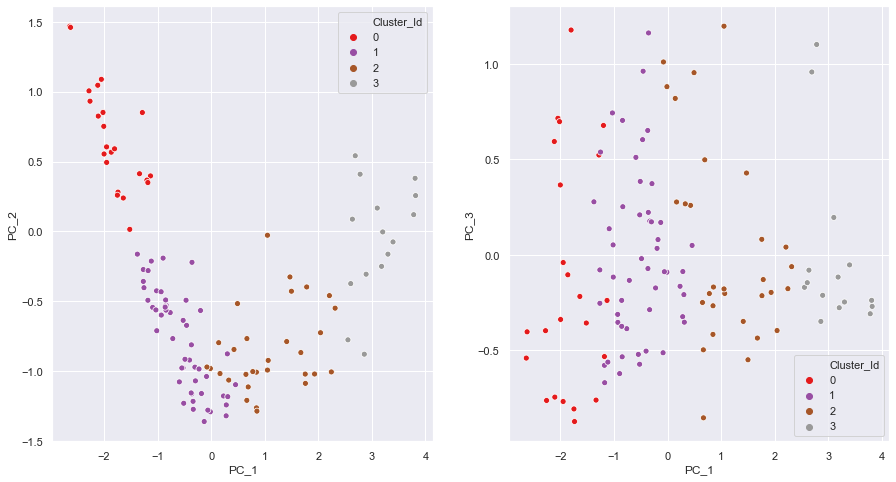

In [92]:
fig, axes = plt.subplots(1,2, figsize=(15,8))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id',legend='full',palette="Set1",data=df_hc,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id',legend='full',palette="Set1",data=df_hc,ax=axes[1])

In [94]:
df_merge_hc = pd.merge(countrydf,df_hc,on='country')
df_merge_col_hc = merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]

In [95]:
df_merge_col_hc.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2000,55.3000,248.2970,41.9174,1610,9.4400,56.2000,5.8200,553,0
1,Algeria,27.3000,1712.6400,1400.4400,185.9820,12900,16.1000,76.5000,2.8900,4460,4
2,Antigua and Barbuda,10.3000,5551.0000,7185.8000,735.6600,19100,1.4400,76.8000,2.1300,12200,1
3,Armenia,18.1000,669.7600,1458.6600,141.6800,6700,7.7700,73.3000,1.6900,3220,4
4,Australia,4.8000,10276.2000,10847.1000,4530.8700,41400,1.1600,82.0000,1.9300,51900,2


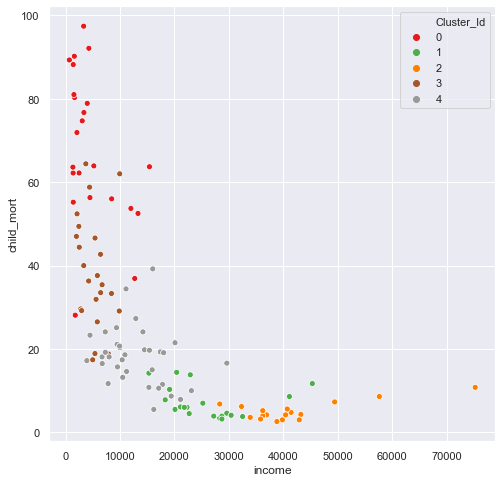

In [97]:
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = df_merge_col_hc,legend='full',palette="Set1")


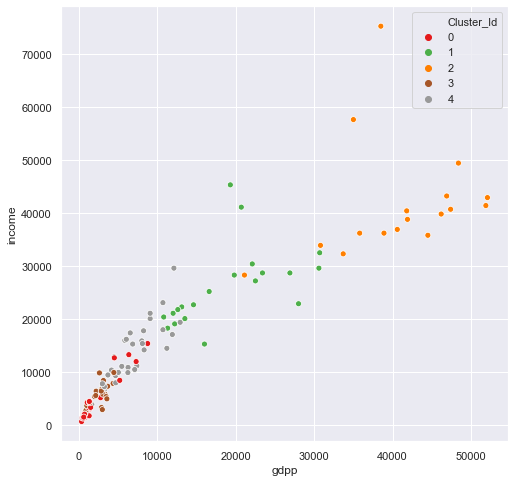

In [98]:
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = df_merge_col_hc,legend='full',palette="Set1")

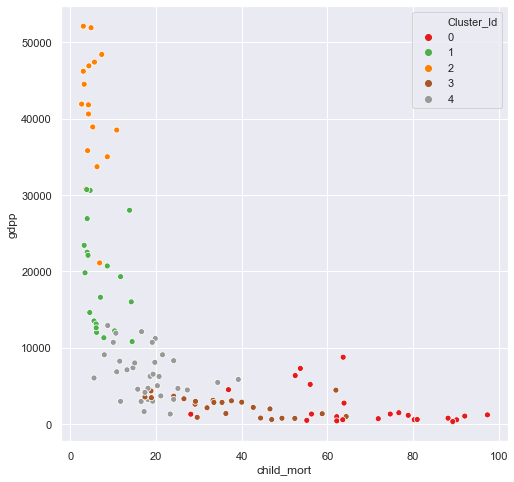

In [99]:
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=df_merge_col_hc,legend='full',palette="Set1")

_It seems K-means clustering is better than the hierarchical clustering. So proceeding with the information provided from **K-means.**_

**Cluster 0 and Cluster 3 are in need of aid.**

In [102]:
df_clus0 = merge_col[merge_col['Cluster_Id'] ==0]

In [103]:
df_clus3 = merge_col[merge_col['Cluster_Id'] ==3]

In [104]:
append= df_clus0.append(df_clus3)

In [105]:
append.head(10)

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2000,55.3000,248.2970,41.9174,1610,9.4400,56.2000,5.8200,553,0
15,Botswana,52.5000,2768.6000,3257.5500,527.0500,13300,8.9200,57.1000,2.8800,6350,0
24,Comoros,88.2000,126.8850,397.5730,34.6819,1410,3.8700,65.9000,4.7500,769,0
25,"Congo, Rep.",63.9000,2331.7400,1498.7800,67.4040,5190,20.7000,60.4000,4.9500,2740,0
33,Eritrea,55.2000,23.0878,112.3060,12.8212,1420,11.6000,61.7000,4.6100,482,0
38,Gabon,63.7000,5048.7500,1653.7500,306.2500,15400,16.6000,62.9000,4.0800,8750,0
39,Gambia,80.3000,133.7560,239.9740,31.9778,1660,4.3000,65.5000,5.7100,562,0
42,Ghana,74.7000,386.4500,601.2900,68.3820,3060,16.6000,62.2000,4.2700,1310,0
52,Iraq,36.9000,1773.0000,1534.5000,378.4500,12700,16.6000,67.2000,4.5600,4500,0
59,Kenya,62.2000,200.1690,324.9120,45.9325,2480,2.0900,62.8000,4.3700,967,0


In [106]:
append.describe()

,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
count,47.0000,47.0000,47.0000,47.0000,47.0000,47.0000,47.0000,47.0000,47.0000,47.0000
mean,52.8574,890.7892,1016.7848,129.5322,4969.5745,8.5741,65.6362,3.7140,2260.7447,1.5319
std,21.8667,1052.0509,884.9270,137.4050,3507.6196,5.8815,4.7627,1.0647,1900.1757,1.5159
min,17.4000,1.0769,0.6511,12.8212,700.0000,0.5050,54.3000,2.3300,327.0000,0.0000
25%,34.4500,132.5150,278.6810,44.3886,2275.0000,3.8350,62.5000,2.6900,777.5000,0.0000
50%,52.5000,454.0800,691.6000,76.8930,4240.0000,7.1400,66.1000,3.5000,1380.0000,3.0000
75%,64.1500,1044.8850,1609.4700,159.7385,6430.0000,11.2500,69.3000,4.5800,3075.0000,3.0000
max,97.4000,5048.7500,3257.5500,650.8320,15400.0000,23.6000,73.5000,6.1500,8750.0000,3.0000


In [107]:
final_list = countrydf[countrydf['child_mort']>53]
final_list.shape

(48, 10)

In [108]:
final_list.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000
mean,93.0208,848.1537,97.5164,754.1698,3695.0625,11.6195,59.5500,4.9121,1797.5000
std,32.4204,2266.2194,149.2196,1509.6237,5325.9968,15.4064,6.5526,1.1486,2852.8295
min,53.7000,1.0769,12.8212,0.6511,609.0000,0.8850,32.1000,2.4100,231.0000
25%,63.8500,101.6303,31.9700,188.8055,1390.0000,3.7925,56.7250,4.3450,551.5000
50%,89.7500,188.2900,48.7265,313.8570,1900.0000,8.2150,60.2500,5.0550,932.0000
75%,111.0000,417.9150,72.7850,571.8375,3785.0000,16.2250,63.8500,5.5975,1377.5000
max,208.0000,14671.8000,766.0800,10071.9000,33700.0000,104.0000,71.1000,7.4900,17100.0000


In [109]:
final_list1 = final_list[final_list['income']<=3695]
final_list1.shape

(35, 10)

In [110]:
final_list1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,35.0000,35.0000,35.0000,35.0000,35.0000,35.0000,35.0000,35.0000,35.0000
mean,98.7200,190.7614,56.9363,352.9760,1735.8000,8.4913,58.3771,5.2526,831.2000
std,32.8870,159.7151,56.7278,280.1672,769.1895,6.6906,6.9571,0.8977,606.5572
min,55.2000,20.6052,12.8212,90.5520,609.0000,0.8850,32.1000,3.3000,231.0000
25%,75.7000,80.3515,31.5122,170.5340,1215.0000,2.7900,56.2500,4.8100,470.5000
50%,90.5000,131.9850,41.9174,254.5600,1540.0000,6.3900,58.7000,5.2100,648.0000
75%,112.5000,224.5845,57.8575,400.2865,2135.0000,12.2000,62.0000,5.7650,1085.0000
max,208.0000,617.3200,328.3200,1190.5100,3370.0000,26.5000,71.1000,7.4900,3600.0000


In [111]:
final_list2 = final_list1[final_list1['gdpp']<=831]
final_list2.shape

(23, 10)

In [112]:
final_list2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,23.0000,23.0000,23.0000,23.0000,23.0000,23.0000,23.0000,23.0000,23.0000
mean,104.3609,105.4037,34.3630,214.7693,1296.6522,7.7520,57.3609,5.4148,521.2174
std,34.9748,49.7106,12.4766,85.1925,392.0044,5.4247,6.8716,0.8583,146.2585
min,55.2000,20.6052,12.8212,90.5520,609.0000,0.8850,32.1000,3.3300,231.0000
25%,84.6000,67.2960,26.6077,167.2820,974.0000,3.4200,55.9000,4.9450,416.0000
50%,93.6000,103.2500,34.6819,192.5440,1390.0000,6.8100,58.0000,5.3400,547.0000
75%,116.0000,132.8705,42.0538,264.0660,1520.0000,11.1000,60.8000,5.8450,621.5000
max,208.0000,196.3440,59.1150,428.3140,2090.0000,20.8000,65.9000,7.4900,769.0000


In [113]:
final_list2['country']

0      Afghanistan             
17     Benin                   
25     Burkina Faso            
26     Burundi                 
31     Central African Republic
36     Comoros                 
37     Congo, Dem. Rep.        
50     Eritrea                 
56     Gambia                  
63     Guinea                  
64     Guinea-Bissau           
66     Haiti                   
88     Liberia                 
93     Madagascar              
94     Malawi                  
97     Mali                    
106    Mozambique              
112    Niger                   
126    Rwanda                  
132    Sierra Leone            
147    Tanzania                
150    Togo                    
155    Uganda                  
Name: country, dtype: object

In [116]:
list_cm = pd.DataFrame(final_list2.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
list_cm.head(30)

,child_mort
country,
Haiti,208.0000
Sierra Leone,160.0000
Central African Republic,149.0000
Mali,137.0000
Niger,123.0000
"Congo, Dem. Rep.",116.0000
Burkina Faso,116.0000
Guinea-Bissau,114.0000
Benin,111.0000


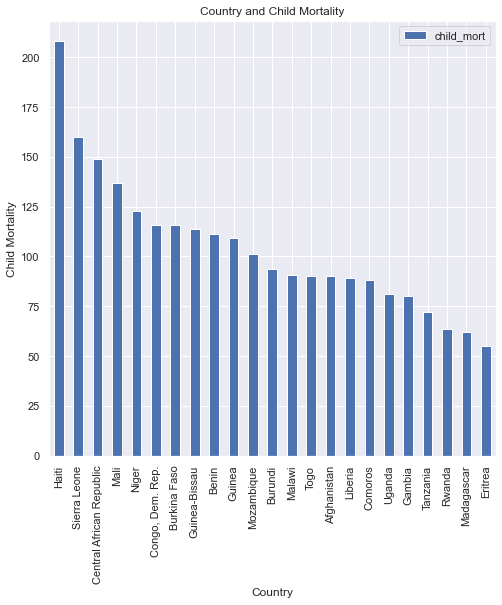

In [117]:
list_cm.plot.bar()
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontsize = 12)
plt.ylabel("Child Mortality", fontsize = 12)
plt.show()

In [118]:
list_in = pd.DataFrame(final_list2.groupby(['country'])['income'].mean().sort_values(ascending = False))
list_in.head(30)

,income
country,
Tanzania,2090
Mali,1870
Benin,1820
Gambia,1660
Afghanistan,1610
Uganda,1540
Haiti,1500
Burkina Faso,1430
Eritrea,1420


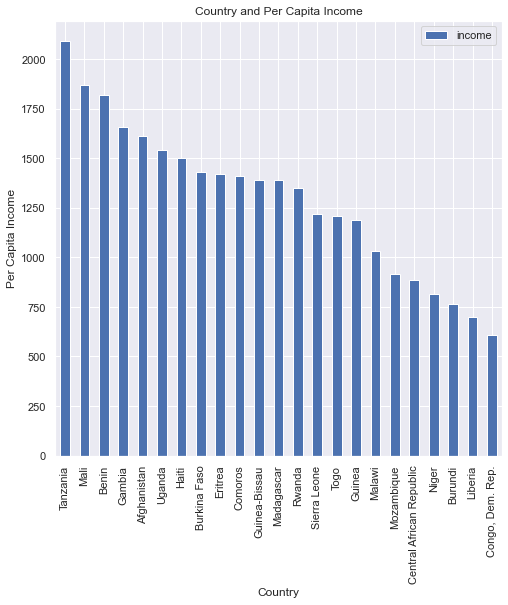

In [119]:
list_in.plot.bar()
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontsize = 12)
plt.ylabel("Per Capita Income", fontsize = 12)
plt.show()

In [120]:
list_gdp = pd.DataFrame(final_list2.groupby(['country'])['gdpp'].mean().sort_values(ascending = False))
list_gdp.head(30)

,gdpp
country,
Comoros,769
Benin,758
Mali,708
Tanzania,702
Haiti,662
Guinea,648
Uganda,595
Burkina Faso,575
Rwanda,563


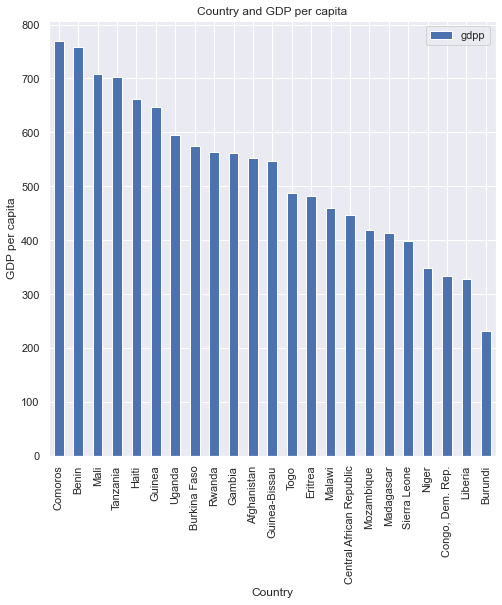

In [122]:
list_gdp.plot.bar()
plt.title('Country and GDP per capita')
plt.xlabel("Country",fontsize = 12)
plt.ylabel("GDP per capita", fontsize = 12)
plt.show()

**Final List of Countries which are in need of help and aid**

In [123]:
final_list2.reset_index(drop=True).country

0     Afghanistan             
1     Benin                   
2     Burkina Faso            
3     Burundi                 
4     Central African Republic
5     Comoros                 
6     Congo, Dem. Rep.        
7     Eritrea                 
8     Gambia                  
9     Guinea                  
10    Guinea-Bissau           
11    Haiti                   
12    Liberia                 
13    Madagascar              
14    Malawi                  
15    Mali                    
16    Mozambique              
17    Niger                   
18    Rwanda                  
19    Sierra Leone            
20    Tanzania                
21    Togo                    
22    Uganda                  
Name: country, dtype: object